In [ ]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

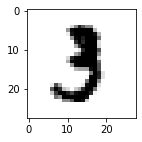

Label: 3


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

image = np.array(mnist.data.loc[10]).reshape((28,28))
label =  mnist.target[10]

plt.figure(figsize = (15,2))
imgplot = plt.imshow(image,cmap=plt.cm.binary)
plt.show()
print("Label:",label)

In [ ]:
mnist.data = np.reshape(np.array(mnist.data),(-1,28,28,1))
mnist.data.shape

(70000, 28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
#Convert to one-hot vector
#For example, label '0' => [1,0,0,0,0,0,0,0,0,0,0], '1' => [0,1,0,0,0,0,0,0,0,0,0], ...
from tensorflow.keras.utils import to_categorical
train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


input_layer = Input(shape=(28,28,1))
conv_layer = Conv2D(50,(3,3),activation="relu",padding="same")(input_layer)
pooling_layer = MaxPooling2D((2,2))(conv_layer)
flatten_layer = Flatten()(pooling_layer)
dense_layer2 = Dense(10, activation="softmax")(flatten_layer)

model = Model(inputs=input_layer, outputs=dense_layer2)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=["accuracy"])
model.summary()
model.fit(train_img,train_lbl,validation_data=(test_img,test_lbl), epochs= 30, batch_size=2000)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 50)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9800)              0         
                                                                 
 dense (Dense)               (None, 10)                98010     
                                                                 
Total params: 98,510
Trainable params: 98,510
Non-trainable params: 0
_________________________________________________________

In [ ]:
model.save_weights("weights.h5")
model.save("model.h5",include_optimizer=False)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


input_layer = Input(shape=(28,28,1))
conv_layer = Conv2D(50,(3,3),activation="relu",padding="same")(input_layer)
pooling_layer = MaxPooling2D((2,2))(conv_layer)
flatten_layer = Flatten()(pooling_layer)
dense_layer2 = Dense(10, activation="softmax")(flatten_layer)

saved_model = Model(inputs=input_layer, outputs=dense_layer2)
saved_model.summary()
saved_model.load_weights("weights.h5")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 50)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9800)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                98010     
                                                                 
Total params: 98,510
Trainable params: 98,510
Non-trainable params: 0
_______________________________________________________

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('model.h5')
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 50)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9800)              0         
                                                                 
 dense (Dense)               (None, 10)                98010     
                                                                 
Total params: 98,510
Trainable params: 98,510
Non-trainable params: 0
_________________________________________________________

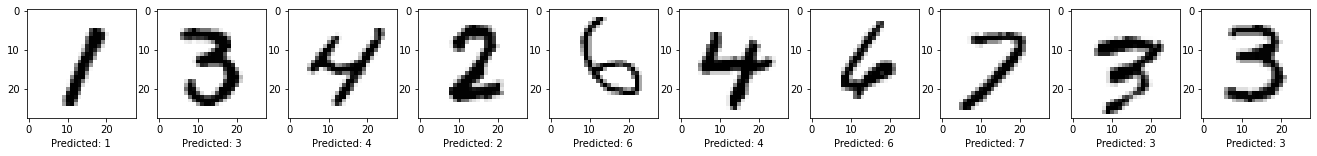

In [ ]:
import numpy
from tensorflow.keras.models import load_model

model = load_model('model.h5')
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=["accuracy"])
n = 10
predictions = model.predict(test_img[10:20])
fig = plt.figure(figsize = (23,4))

for i in range(10, 20):
  ax = fig.add_subplot(1, n, i-10+1)  
  plt.imshow(test_img[i].reshape(28,28),cmap=plt.cm.binary)
  predicted = numpy.argmax(predictions[i-10])
  ax.set_xlabel("Predicted: %d" % predicted)
  # print("Ground truth: %d, predicted: %d" % (numpy.argmax(test_lbl[i]), numpy.argmax(predictions[i])))
plt.show()